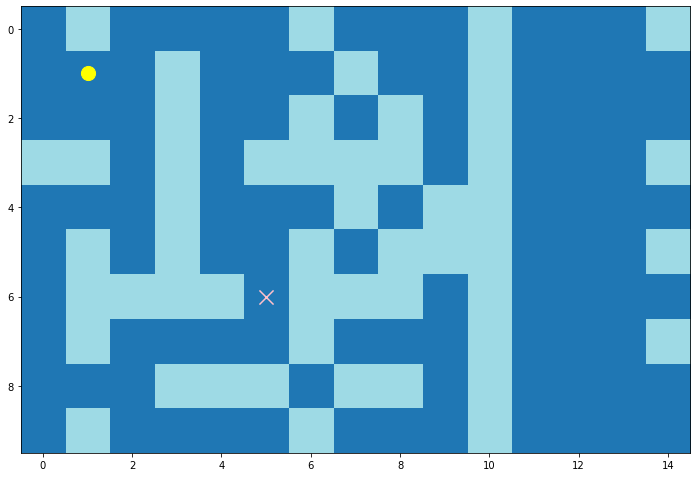

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# create a maze 

maze = [[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1],
       [0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]]

start = (1, 1) # start point
end = (6, 5)  # end point

# ploting the maze 
grid = np.array(maze)

fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(grid, cmap=plt.cm.tab20)
ax.scatter(start[1],start[0], marker = "o", color = "yellow", s = 200)
ax.scatter(end[1],end[0], marker = "x", color = "pink", s = 200)
plt.show()

In [0]:
# Create a Node class
class Node:

    def __init__(self, previous_node, position):
        self.previous_node = previous_node
        self.position = position

        self.g = 0 
        self.h = 0
        self.f = 0

    def getDistance(self, to):
        return np.sqrt(((self.position[0] - to.position[0]) ** 2) + ((self.position[1] - to.position[1]) ** 2))
        
    def __eq__(self, other):
        return self.position == other.position

In [0]:
# Define function returning array of tuple values representing x's and y's of the points of the found path
def findPath(maze, start, end):

    # Get maze borders
    maze_height = len(maze) - 1
    maze_length = len(maze[0]) - 1

    start_node = Node(None, start) # creating start point and setting its values to 0's
    start_node.g = 0
    start_node.h = 0
    start_node.f = 0

    end_node = Node(None, end)
    end_node.g = 0
    end_node.h = 0
    end_node.f = 0

    # Initialize both open and closed list
    open_list = [] 
    closed_list = []

    # Add the start node
    open_list.append(start_node)

    counter = 0

    # Loop until you find the end
    while True:
        # Get the current node
        current_node = open_list[0]
        current_index = 0  

        # Find the best possible node and save it as current node
        for index, node in enumerate(open_list):
            if node.f < current_node.f:     # find the node with the lowest F value
                current_node = node
                current_node_index = index


        open_list.pop(current_index)      # remove current node from possible nodes list
        closed_list.append(current_node)  # add current node to the closed nodes list

        # Check if current node is the end node
        if current_node.position == end_node.position:
            path = []
            temp_current = current_node
            while temp_current is not None:
                path.append(temp_current.position)
                temp_current = temp_current.previous_node     # Get previous nodes of current node positions
            return path[::-1]                                 # Return reversed path

        # Generate children array. Children are possible nodes from current node
        children = []
        
        for direction in [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]:    # Possible nodes

            # Get child node position
            node_position = (current_node.position[0] + direction[0], current_node.position[1] + direction[1])

            # Check if the child node is not beyond maze border
            if node_position[0] > maze_height:    # bottom border
                continue
            
            if node_position[0] < 0:               # top border
                continue

            if node_position[1] > maze_length:     # right border
                continue

            if node_position[1] < 0:               # left border
                continue

            # Check if the child node is not a wall
            if maze[node_position[0]][node_position[1]] != 0:
                continue

            # Create new child node
            new_node = Node(current_node, node_position)

            # Add node to children list
            children.append(new_node)

        # Loop through children list
        for child in children:
            # Child is on the closed list

            # Child is on the closed list
            for closed_child in closed_list:
                if child == closed_child:
                    continue

            # Create the f, g, and h values
            child.g = current_node.g + 1
            child.h = ((child.position[0] - end_node.position[0]) ** 2) + ((child.position[1] - end_node.position[1]) ** 2)
            child.f = child.g + child.h

            # Child is already in the open list
            for open_node in open_list:
                if child == open_node and child.g > open_node.g:
                    continue

            # Add the child to the open list
            open_list.append(child)


            # Calculate G, F and H values
            #child.g = current_node.g + current_node.getDistance(child) # G of the child node is its parent's node G plus distance from parent to child. It is the cost of the way from start node
            #child.h = child.getDistance(end_node)                      # H is distance of the child node to end node
            #child.f = child.g + child.h                                # F value is a sum of G and H value


In [0]:
start = (1, 1) # start point
end = (6,5)  # end point


path = findPath(maze, start, end)
print(path)

# Get coordinates for route
x_coords = []
y_coords = []

for i in range(len(path)):
    x_coords.append(path[i][0])
    y_coords.append(path[i][1])

# plot map and path

fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(grid, cmap=plt.cm.tab20)
ax.scatter(start[1],start[0], marker = "o", color = "yellow", s = 200)
ax.scatter(end[1],end[0], marker = "x", color = "pink", s = 250)
ax.plot(y_coords,x_coords, color = "red")
plt.show()

KeyboardInterrupt: ignored

In [0]:
class Node():
    """A node class for A* Pathfinding"""

    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position


def astar(maze, start, end):
    """Returns a list of tuples as a path from the given start to the given end in the given maze"""

    # Create start and end node
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0

    # Initialize both open and closed list
    open_list = []
    closed_list = []

    # Add the start node
    open_list.append(start_node)

    # Loop until you find the end
    while len(open_list) > 0:

        # Get the current node
        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index

        # Pop current off open list, add to closed list
        open_list.pop(current_index)
        closed_list.append(current_node)

        # Found the goal
        if current_node == end_node:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            return path[::-1] # Return reversed path

        # Generate children
        children = []
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]: # Adjacent squares

            # Get node position
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            # Make sure within range
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0:
                continue

            # Make sure walkable terrain
            if maze[node_position[0]][node_position[1]] != 0:
                continue

            # Create new node
            new_node = Node(current_node, node_position)

            # Append
            children.append(new_node)

        # Loop through children
        for child in children:

            # Child is on the closed list
            for closed_child in closed_list:
                if child == closed_child:
                    continue

            # Create the f, g, and h values
            child.g = current_node.g + 1
            child.h = ((child.position[0] - end_node.position[0]) ** 2) + ((child.position[1] - end_node.position[1]) ** 2)
            child.f = child.g + child.h

            # Child is already in the open list
            for open_node in open_list:
                if child == open_node and child.g > open_node.g:
                    continue

            # Add the child to the open list
            open_list.append(child)



maze = [[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1],
       [0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]]

start = (1, 1) # start point
end = (2, 4)  # end point

path = astar(maze, start, end)
print(path)



[(1, 1), (1, 2), (0, 3), (1, 4), (2, 4)]


[(1, 1), (1, 2), (0, 3), (1, 4), (2, 4), (3, 4), (4, 5), (5, 5), (6, 5), (7, 5), (8, 6), (7, 7), (7, 8), (6, 9)]


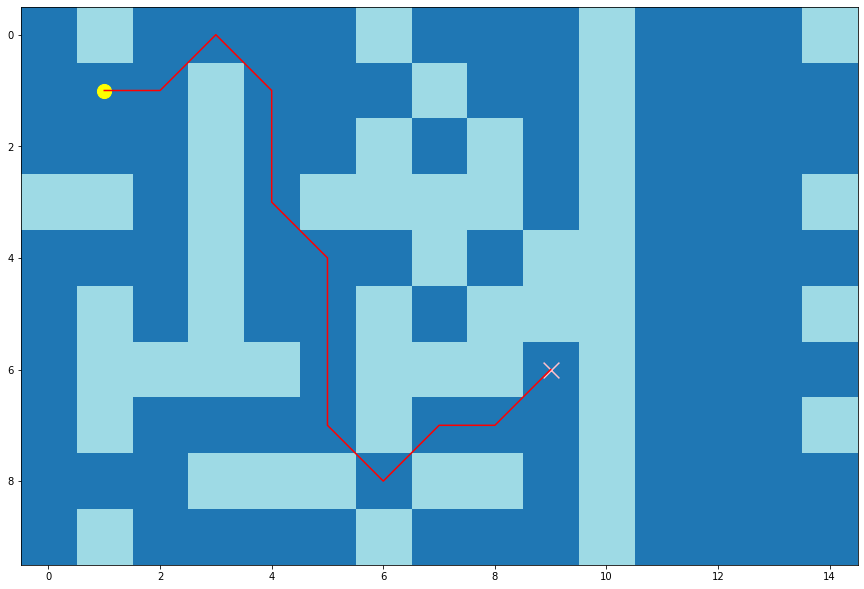

In [4]:

import numpy as np

import heapq

import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

# maze

maze = [[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1],
       [0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]]

grid = np.array(maze)

start = (1,1)

end = (6,9)

# Get maze borders
maze_height = len(maze) - 1
maze_length = len(maze[0]) - 1

# function to calculate distance

def distance(a, b):

    return np.sqrt((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2)

# Find path function returning array of tuples valus representing path points through the maze

def findPath(array, start, end):

    children = [(0,1),(0,-1),(1,0),(-1,0),(1,1),(1,-1),(-1,1),(-1,-1)]

    close_set = set()

    came_from = {}

    gscore = {start:0}

    fscore = {start:distance(start, end)}

    oheap = []

    heapq.heappush(oheap, (fscore[start], start))
 

    while oheap:

        current = heapq.heappop(oheap)[1]

        if current == end:

            path = []

            while current in came_from:

                path.append(current)

                current = came_from[current]

            return path

        close_set.add(current)

        for i, j in children:

            # get child node position
            child = current[0] + i, current[1] + j

            tentative_g_score = gscore[current] + distance(current, child)

            # Check if the child node is not beyond maze border
            if child[0] > maze_height:    # bottom border
                continue
            
            if child[0] < 0:               # top border
                continue

            if child[1] > maze_length:     # right border
                continue

            if child[1] < 0:               # left border
                continue

            # Check if the child node is not a wall
            if maze[child[0]][child[1]] != 0:
                continue
 

            if child in close_set and tentative_g_score >= gscore.get(child, 0):

                continue
 

            if  tentative_g_score < gscore.get(child, 0) or child not in [i[1]for i in oheap]:

                came_from[child] = current

                gscore[child] = tentative_g_score

                fscore[child] = tentative_g_score + distance(child, end)

                heapq.heappush(oheap, (fscore[child], child))
 

    return False


path = findPath(grid, start, end)

path = path + [start]

path = path[::-1]

print(path)



# plot the path

# Get coordinates for route
x_coords = []
y_coords = []

for i in range(len(path)):
    x_coords.append(path[i][0])
    y_coords.append(path[i][1])

# plot map and path

fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(grid, cmap=plt.cm.tab20)
ax.scatter(start[1],start[0], marker = "o", color = "yellow", s = 200)
ax.scatter(end[1],end[0], marker = "x", color = "pink", s = 250)
ax.plot(y_coords,x_coords, color = "red")
plt.show()

In [63]:
## Changed
import numpy as np

import heapq

import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

# maze

maze = [[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1],
       [0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]]

grid = np.array(maze)

start = (1,1)

end = (6,12)

# Get maze borders
maze_height = len(maze) - 1
maze_length = len(maze[0]) - 1

# function to calculate distance

def distance(a, b):

    return np.sqrt((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2)

class Node:

    def __init__(self, previous_node, position):
        self.previous_node = previous_node
        self.position = position

        self.g = 0 
        self.h = 0
        self.f = 0

# Find path function returning array of tuples valus representing path points through the maze

def findPath(array, start, end):

    children = [(0,1),(0,-1),(1,0),(-1,0),(1,1),(1,-1),(-1,1),(-1,-1)]

    close_set = []

    open_set = []

    start_node = Node(None, start) # creating start point and setting its values to 0's
    start_node.g = 0
    start_node.h = distance(start, end)
    start_node.f = start_node.g + start_node.h

    open_set.append(start_node)
 
    while len(open_set) > 0:
        current = open_set[0]
        current_index = 0

        for index, onode in enumerate(open_set):
          if onode.f < current.f:
            current = onode
            current_index = index

        if current.position == end:
            path = []
            path_node = current
            while path_node.previous_node is not None:
                path.append(path_node.position)
                path_node = path_node.previous_node
            path.append(start)
            return path[::-1] # Return reversed path

        open_set.pop(current_index)
        close_set.append(current)

        for i, j in children:

            # get child node position
            child_position = (current.position[0] + i, current.position[1] + j)

            # Check if the child node is not beyond maze border
            if child_position[0] > maze_height:    # bottom border
                continue
            
            if child_position[0] < 0:               # top border
                continue

            if child_position[1] > maze_length:     # right border
                continue

            if child_position[1] < 0:               # left border
                continue

            # Check if the child node is not a wall
            if maze[child_position[0]][child_position[1]] != 0:
                continue

            child = Node(current, child_position)
            child.g = current.g + distance(current.position, child.position)
            child.h = distance(child.position, end)
            child.f = child.g + child.h

            found = False
            for closed_child in close_set:
              if closed_child.position == child.position and child.g >= closed_child.g:
                found = True

            if(found == True):
              continue
            
            found = False
            for open_child in open_set:
              if open_child.position == child.position:
                found = True
                if child.g < open_child.g:
                  open_set.append(child)

            if(found == False):
                open_set.append(child)
    return False

path = findPath(grid, start, end)

if(path == False):
  path = "There is no way to the end. You are lost in maze forever!"
  
print(path)



There is no way to the end. You are lost in maze forever!


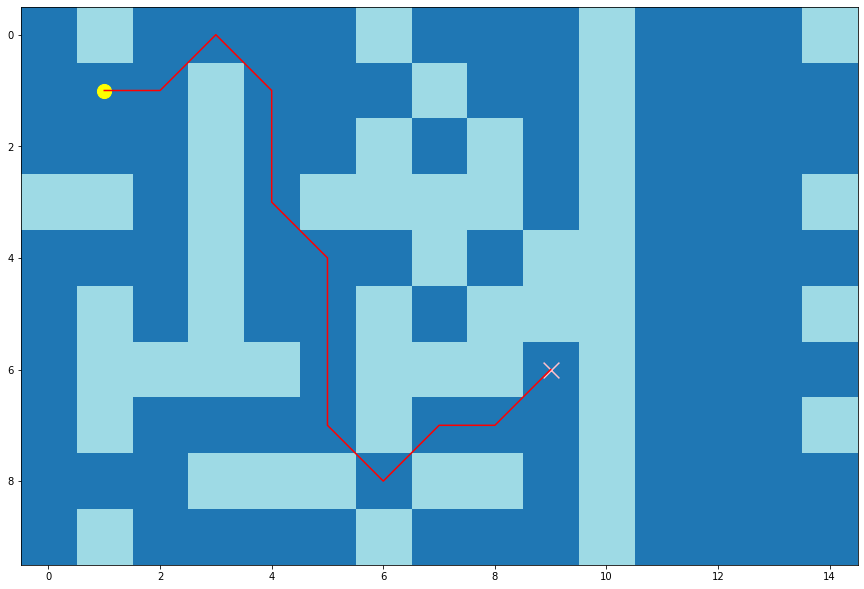

In [59]:


# plot the path

# Get coordinates for route
x_coords = []
y_coords = []

for i in range(len(path)):
    x_coords.append(path[i][0])
    y_coords.append(path[i][1])

# plot map and path

fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(grid, cmap=plt.cm.tab20)
ax.scatter(start[1],start[0], marker = "o", color = "yellow", s = 200)
ax.scatter(end[1],end[0], marker = "x", color = "pink", s = 250)
ax.plot(y_coords,x_coords, color = "red")
plt.show()